In [282]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [283]:
import pandas as pd
from sklearn.datasets import load_iris
original_dataset = load_iris()
print(original_dataset["feature_names"])
data_X = original_dataset["data"]
data_y = original_dataset["target"]
data_X.shape, data_y.shape

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


((150, 4), (150,))

In [284]:
# binary classifier using logistic regression
# to predict whether or not the target is >>>> setosa <<<<
# all setosas will be 1
# all other will be 0
original_dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    data_X, 
    data_y, 
    test_size=0.25, 
    random_state=69)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.mean(), X_train.max(), X_train.min())
print(y_train[:10])


# change the dataset(s) to show setosa or not setosa
y_train = 1*(y_train == 0)
y_test = 1*(y_test == 0)
print(y_train[:10])
print((y_train == 1).sum())

(112, 4) (38, 4) (112,) (38,)
3.455580357142857 7.9 0.1
[1 2 0 2 1 0 1 1 2 1]
[0 0 1 0 0 1 0 0 0 0]
36


In [286]:
def forward(weights, xdata):
    return 1/(1+(np.e**(-weights.dot(xdata.T))))

n = len(X_train[0])
m = len(X_train)
my_weights = np.zeros(n)

print(forward(my_weights, X_train))

def cost(weights, xdata, ydata):
    return -np.sum((ydata*np.log(forward(weights, xdata)))+((1-ydata)*np.log(1-forward(weights, xdata))))

print(cost(my_weights, X_train, y_train))

def get_gradient():
    ders = np.zeros(n)
    for i in range(n):
        ders[i] = np.sum((forward(my_weights, X_train)-y_train)*X_train[:,i])
    return ders

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5]
77.63248422271387


100%|█████████████████████████████████| 10000/10000 [00:01<00:00, 9042.05it/s]

[ 0.28939832  0.98533945 -1.52972822 -0.69300942]
6.233249329147599


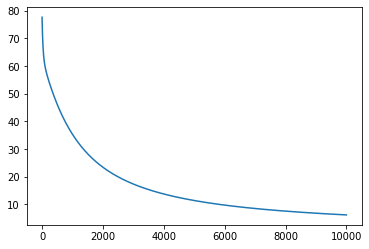

In [287]:
lr = 0.00001
n_epochs = 10000

losses = []

my_weights = np.zeros(n)

for i in tqdm(range(n_epochs)):
    
    losses.append(cost(my_weights, X_train, y_train))
    
    gradients = get_gradients()
    
    my_weights -= lr*gradients
    
    
plt.plot(losses)
    
print(my_weights)
print(losses[len(losses)-1])

In [289]:
preds = np.round(forward(my_weights, X_test))
print((preds == y_test).sum(), "/", len(y_test))
preds = np.round(forward(my_weights, X_train))
print((preds == y_train).sum(), "/", len(y_train))

38 / 38
112 / 112
